# Initial Analysis to Understand the Data 
Jenn Wong

In [39]:
from glob import glob
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

spotify_color = '#5bb560'

In [40]:
log_mini_df = pd.read_csv('data/training_set/log_mini.csv')

In [41]:
log_mini_df.info() # session position needs to be normalized with the session lenght to make fair comparison

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 21 columns):
session_id                         167880 non-null object
session_position                   167880 non-null int64
session_length                     167880 non-null int64
track_id_clean                     167880 non-null object
skip_1                             167880 non-null bool
skip_2                             167880 non-null bool
skip_3                             167880 non-null bool
not_skipped                        167880 non-null bool
context_switch                     167880 non-null int64
no_pause_before_play               167880 non-null int64
short_pause_before_play            167880 non-null int64
long_pause_before_play             167880 non-null int64
hist_user_behavior_n_seekfwd       167880 non-null int64
hist_user_behavior_n_seekback      167880 non-null int64
hist_user_behavior_is_shuffle      167880 non-null bool
hour_of_day                        16


User Behavior right before the song was played which led to this song discovery



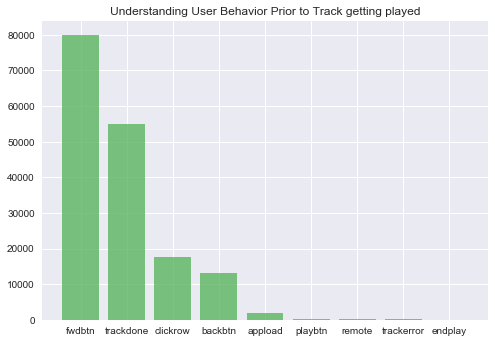

In [58]:
user_history_start = log_mini_df.hist_user_behavior_reason_start.value_counts()
output_message = """
User Behavior right before the song was played which led to this song discovery
"""
print(output_message)
plt.bar(user_history_start.index, user_history_start, color = spotify_color, alpha = 0.8)
plt.title('Understanding User Behavior Prior to Track getting played')
plt.show();

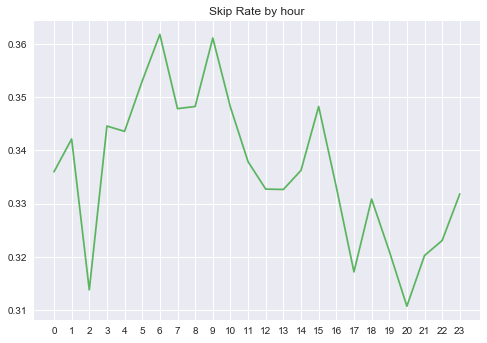

In [19]:
skip_rates = (log_mini_df.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_df.groupby('hour_of_day')['not_skipped'].count())

plt.plot(skip_rates.index, skip_rates, color = spotify_color)
plt.title('Skip Rate by hour')
plt.xticks(skip_rates.index)


plt.show();

Number of songs played by Premium users: 136053
Number of songs played by Non-Premium users: 31827 
      


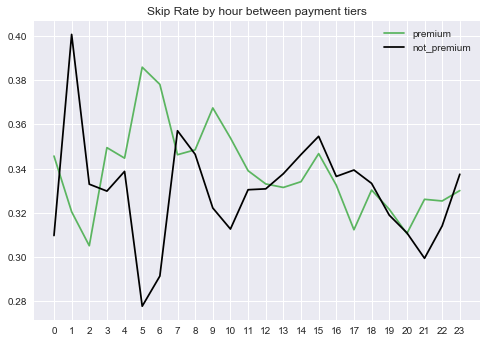

In [32]:
# is there a difference if they're premium or not

premium_mask = (log_mini_df.premium ==1)
log_mini_premium = log_mini_df[premium_mask]
log_mini_not_premium = log_mini_df[~premium_mask]

premium_skip_rates = (log_mini_premium.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_premium.groupby('hour_of_day')['not_skipped'].count())

not_premium_skip_rates = (log_mini_not_premium.groupby('hour_of_day')['not_skipped'].sum() 
              /log_mini_not_premium.groupby('hour_of_day')['not_skipped'].count())

print(f"""Number of songs played by Premium users: {len(log_mini_premium)}
Number of songs played by Non-Premium users: {len(log_mini_not_premium)} 
      """)

plt.plot(premium_skip_rates.index, premium_skip_rates, color = spotify_color)
plt.plot(not_premium_skip_rates.index, not_premium_skip_rates, color = 'black')

plt.title('Skip Rate by hour between payment tiers')
plt.xticks(skip_rates.index)
plt.legend(labels=['premium', 'not_premium'])

plt.show();

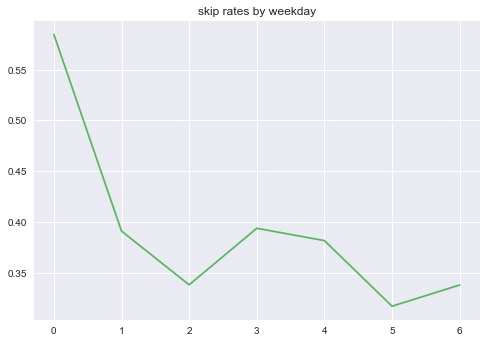

In [69]:
## I wonder if the weekday has something to do with it as well. Is there some seasonality?

log_mini_df['date'] = pd.to_datetime(log_mini_df.date)

def get_weekday(datetime_object):
    """
    pass datetime object to get the weekday
    """
    return datetime_object.weekday()

log_mini_df['weekday'] = log_mini_df['date'].apply(get_weekday)
weekday_skip_rates = (log_mini_df.groupby('weekday')['not_skipped'].sum()/
                     log_mini_df.groupby('weekday')['not_skipped'].count())

plt.plot(weekday_skip_rates.index, weekday_skip_rates, color = spotify_color)
plt.title('skip rates by weekday')

plt.show();

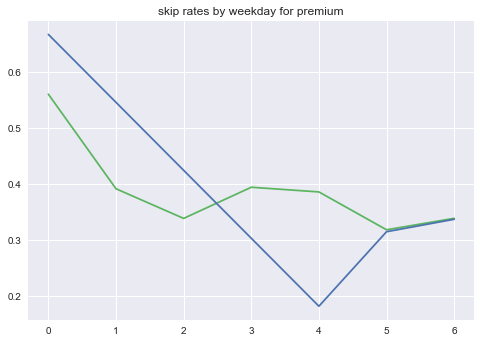

In [73]:
# is there a difference between premium and free?

weekday_skip_rates_premium = (log_mini_df[log_mini_df.premium ==1].groupby('weekday')['not_skipped'].sum()/
                     log_mini_df[log_mini_df.premium ==1].groupby('weekday')['not_skipped'].count())

weekday_skip_rates_free = (log_mini_df[log_mini_df.premium ==0].groupby('weekday')['not_skipped'].sum()/
                     log_mini_df[log_mini_df.premium ==0].groupby('weekday')['not_skipped'].count())

plt.plot(weekday_skip_rates_premium.index, weekday_skip_rates_premium, color = spotify_color)
plt.plot(weekday_skip_rates_free.index, weekday_skip_rates_free)
plt.title('skip rates by weekday for premium')

plt.show();

In [74]:
weekday_skip_rates_free # note this means that I can't compare the two populations bc incomplete data

weekday
0    0.666667
4    0.181818
5    0.314706
6    0.336887
Name: not_skipped, dtype: float64